# 线性回归
### 引进包，Boston data用做练习

In [9]:
%matplotlib inline
from sklearn import datasets
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.preprocessing import scale 

import sklearn

In [10]:
#import boston data
boston=datasets.load_boston()
y=boston.target
x=boston.data
boston['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], 
      dtype='|S7')

In [11]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

results=smf.ols('boston.target~boston.data',data=boston).fit()

print results.summary()

                            OLS Regression Results                            
Dep. Variable:          boston.target   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Thu, 19 May 2016   Prob (F-statistic):          6.95e-135
Time:                        10:51:23   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept          36.4911      5.104     

In [12]:
regr=linear_model.LinearRegression()
lm=regr.fit(boston.data,y)
lm.intercept_,lm.coef_,lm.score(boston.data,y)

(36.491103280361237,
 array([ -1.07170557e-01,   4.63952195e-02,   2.08602395e-02,
          2.68856140e+00,  -1.77957587e+01,   3.80475246e+00,
          7.51061703e-04,  -1.47575880e+00,   3.05655038e-01,
         -1.23293463e-02,  -9.53463555e-01,   9.39251272e-03,
         -5.25466633e-01]),
 0.74060774286494269)

In [13]:
predicted=regr.predict(boston.data)

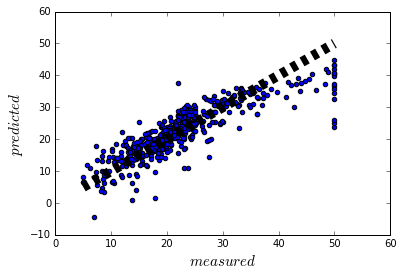

In [14]:
fig,ax=plt.subplots()
ax.scatter(y,predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=10)
ax.set_xlabel('$measured$',fontsize=15)
ax.set_ylabel('$predicted$',fontsize=15)

## 区分训练集和测试集

In [15]:
from sklearn.cross_validation import train_test_split
Xs_train,Xs_test,y_train,y_test=train_test_split(boston.data,boston.target, test_size=0.6, random_state=20)

In [16]:
regr=linear_model.LinearRegression()
lm=regr.fit(Xs_train,y_train)
lm.score(Xs_train,y_train)

0.73368146747775675

In [17]:
predicted=regr.predict(Xs_test)

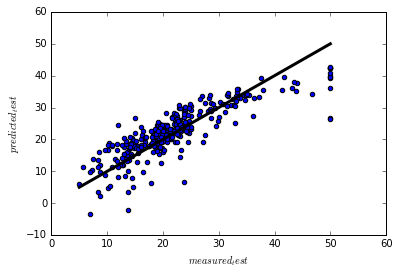

In [18]:
fig,ax=plt.subplots()
ax.scatter(y_test,predicted)
ax.plot([y.min(),y.max()],[y.min(),y.max()],'k-',lw=3)
ax.set_xlabel('$measured_test$',fontsize=10)
ax.set_ylabel('$predicted_test$',fontsize=10)
plt.show()

## 交叉验证

In [19]:
from sklearn.cross_validation import cross_val_score

regr=linear_model.LinearRegression()
scores=cross_val_score(regr,boston.data,boston.target,cv=3)
scores.mean()

-1.5787701857181775

In [20]:
data_X_scale = scale(boston.data)
scores = cross_val_score(regr, boston.data, boston.target, cv = 7)
scores.mean()  

0.45384871359695766

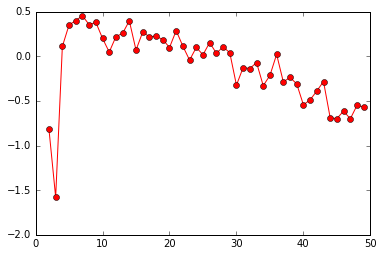

In [21]:
scores = [cross_val_score(regr, data_X_scale, boston.target, cv = int(i)).mean() for i in range(2, 50)]
plt.plot(range(2, 50), scores,'r-o')
plt.show()

## 分析天涯bbs数据

In [22]:
import pandas as pd
df=pd.read_csv('/Users/apricot/documents/github/cjc2016/data/tianya_bbs_threads_list.txt', sep = "\t", header=None)
df=df.rename(columns={0:'title',1:'link',2:'author',3:'author_page',4:'click', 5:'reply', 6:'time'})
df[:2]

,title,link,author,author_page,click,reply,time
0,【民间语文第161期】宁波px启示:船进港湾人应上岸,/post-free-2849477-1.shtml,贾也,http://www.tianya.cn/50499450,194675,2703,2012-10-29 07:59
1,宁波镇海PX项目引发群体上访 当地政府发布说明(转载),/post-free-2839539-1.shtml,无上卫士ABC,http://www.tianya.cn/74341835,88244,1041,2012-10-24 12:41


In [23]:
def randomSplit(dataX, dataY, num):
    dataX_train = []
    dataX_test = []
    dataY_train = []
    dataY_test = []
    import random
    test_index = random.sample(range(len(df)), num)
    for k in range(len(dataX)):
        if k in test_index:
            dataX_test.append([dataX[k]])
            dataY_test.append(dataY[k])
        else:
            dataX_train.append([dataX[k]])
            dataY_train.append(dataY[k])
    return dataX_train, dataX_test, dataY_train, dataY_test, 

In [24]:
import numpy as np

# Use only one feature
data_X = df.reply
# Split the data into training/testing sets
data_X_train, data_X_test, data_y_train, data_y_test = randomSplit(np.log(df.click+1), np.log(df.reply+1), 20)
# Create linear regression object
regr = linear_model.LinearRegression()
# Train the model using the training sets
regr.fit(data_X_train, data_y_train)
# Explained variance score: 1 is perfect prediction
print'Variance score: %.2f' % regr.score(data_X_test, data_y_test)

Variance score: 0.45


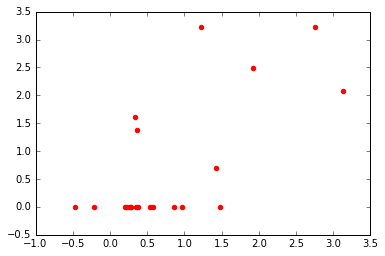

In [25]:
y_true,y_pred=data_y_test,regr.predict(data_X_test)
plt.scatter(y_pred,y_true,color='red')
plt.show()

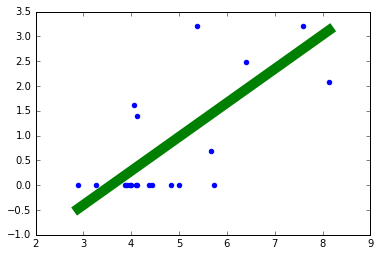

In [26]:
plt.scatter(data_X_test,data_y_test,color='blue')
plt.plot(data_X_test,regr.predict(data_X_test),color='green',linewidth=10)
plt.show()

In [27]:
print 'coefficients: ',regr.coef_

coefficients:  [ 0.68566635]


In [28]:
print 'residual sum of squares: %.2f' % np.mean((regr.predict(data_X_test)-data_y_test)**2)

residual sum of squares: 0.70


In [29]:
df.click_log = [[df.click[i]] for i in range(len(df))]
df.reply_log = [[df.reply[i]] for i in range(len(df))]

In [30]:
from sklearn.cross_validation import train_test_split
Xs_train, Xs_test, y_train, y_test = train_test_split(df.click_log, df.reply_log,test_size=0.2, random_state=20)

# Create linear regression object
regr = linear_model.LinearRegression()
# Train the model using the training sets
regr.fit(Xs_train, y_train)
# Explained variance score: 1 is perfect prediction
print'Variance score: %.2f' % regr.score(Xs_test, y_test)

Variance score: 0.53


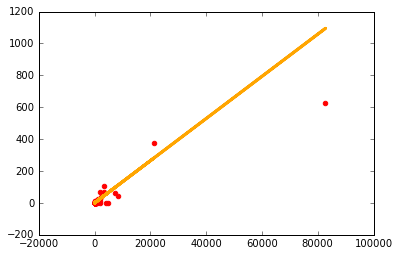

In [31]:
plt.scatter(Xs_test,y_test,color='red')
plt.plot(Xs_test,regr.predict(Xs_test),color='orange',linewidth=3)
plt.show()

In [32]:
from sklearn.cross_validation import cross_val_score
regr=linear_model.LinearRegression()
scores=cross_val_score(regr,df.click_log,df.reply_log,cv=5)
scores.mean()

0.095948996417933932

In [33]:
regr=linear_model.LinearRegression()
scores=cross_val_score(regr,df.click_log,df.reply_log,cv=3)
scores.mean()

0.21630869764168115

## 使用sklearn做logistic回归

In [34]:
repost=[]
for i in df.title:
    if u'转载'in i.decode('utf8'):
        repost.append(1)
    else:
        repost.append(0)

In [35]:
data_X=[[df.click[i],df.reply[i]] for i in range(len(df))]
data_X[:5]

[[194675, 2703], [88244, 1041], [82779, 625], [45304, 219], [38132, 835]]

In [36]:
from sklearn.linear_model import LogisticRegression
df['repost']=repost
model=LogisticRegression()
model.fit(data_X,df.repost)
model.score(data_X,df.repost)

0.61241970021413272

In [37]:
def randomSplitLogistic(dataX,dataY,num):
    dataX_train=[]
    dataX_test=[]
    dataY_train=[]
    dataY_test=[]
    import random
    test_index=random.sample(range(len(df)),num)
    for k in range(len(dataX)):
        if k in test_index:
            dataX_test.append(dataX[k])
            dataY_test.append(dataY[k])
        else:
            dataX_train.append(dataX[k])
            dataY_train.append(dataY[k])
    return dataX_train,dataX_test,dataY_train,dataY_test

In [38]:
# Split the data into training/testing sets
data_X_train, data_X_test, data_y_train, data_y_test = randomSplitLogistic(data_X, df.repost, 20)
# Create logistic regression object
log_regr = LogisticRegression()
# Train the model using the training sets
log_regr.fit(data_X_train, data_y_train)
# Explained variance score: 1 is perfect prediction
print'Variance score: %.2f' % log_regr.score(data_X_test, data_y_test)

Variance score: 0.65


In [39]:
y_true,y_pred=data_y_test,log_regr.predict(data_X_test)

In [40]:
y_true,y_pred

([0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1],
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]))

In [41]:
print(classification_report(y_true, y_pred))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00         7
          1       0.65      1.00      0.79        13

avg / total       0.42      0.65      0.51        20



/Users/apricot/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [42]:
from sklearn.cross_validation import train_test_split
Xs_train, Xs_test, y_train, y_test = train_test_split(data_X, df.repost, test_size=0.2, random_state=42)

In [43]:
# Create logistic regression object
log_regr = LogisticRegression()
# Train the model using the training sets
log_regr.fit(Xs_train, y_train)
# Explained variance score: 1 is perfect prediction
print'Variance score: %.2f' % log_regr.score(Xs_test, y_test)

Variance score: 0.60


In [44]:
# Create logistic regression object
log_regr = LogisticRegression()
# Train the model using the training sets
log_regr.fit(Xs_train, y_train)
# Explained variance score: 1 is perfect prediction
print'Variance score: %.2f' % log_regr.score(Xs_test, y_test)

Variance score: 0.60


In [45]:
logre = LogisticRegression()
scores = cross_val_score(logre, data_X, df.repost, cv = 3)
scores.mean()  

0.53333333333333333

In [46]:
logre = LogisticRegression()
data_X_scale = scale(data_X)
# The importance of preprocessing in data science and the machine learning pipeline I: 
scores = cross_val_score(logre, data_X_scale, df.repost, cv = 3)
scores.mean()  

0.62948717948717947

## 贝叶斯

In [47]:
from sklearn import naive_bayes
' '.join(dir(naive_bayes))

'ABCMeta BaseDiscreteNB BaseEstimator BaseNB BernoulliNB ClassifierMixin GaussianNB LabelBinarizer MultinomialNB __all__ __builtins__ __doc__ __file__ __name__ __package__ _check_partial_fit_first_call abstractmethod binarize check_X_y check_array check_is_fitted in1d issparse label_binarize logsumexp np safe_sparse_dot six'

In [48]:
from sklearn.naive_bayes import GaussianNB
import numpy as np

x= np.array([[-3,7],[1,5], [1,2], [-2,0], [2,3], [-4,0], [-1,1], [1,1], [-2,2], [2,7], [-4,1], [-2,7]])
Y = np.array([4, 4, 4, 4, 3, 4, 4, 3, 4, 3, 3, 3])

In [49]:
model=GaussianNB()
model.fit(x[:8],Y[:8])
predicted=model.predict([[1,2],[3,4]])
print predicted

[3 4]


In [50]:
model.score(x[8:],Y[8:])

0.25

# cross-validation

In [52]:
data_X_train,data_X_test,data_y_train,data_y_test = randomSplit(df.click, df.reply, 20)
model.fit(data_X_train,data_y_train)
predictd=model.predict(data_X_test)
print predicted

[3 4]


In [53]:
model.score(data_X_test,data_y_test)

0.69999999999999996

In [54]:
from sklearn.cross_validation import cross_val_score

model=GaussianNB()
scores=cross_val_score(model,[[c]for c in df.click],df.reply,cv=5)
scores.mean()

/Users/apricot/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:516: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=5.
  % (min_labels, self.n_folds)), Warning)


0.49403904714780522

# 决策树

In [55]:
from sklearn import tree
model=tree.DecisionTreeClassifier(criterion='gini')

In [56]:
data_X_train,data_X_test,data_y_train,data_y_test=randomSplitLogistic(data_X, df.repost, 20)
model.fit(data_X_train,data_y_train)
model.score(data_X_train,data_y_train)

0.92170022371364657

In [57]:
model.predict(data_X_test)

array([0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [58]:
scores=cross_val_score(model,data_X,df.repost,cv=3)
scores.mean()

0.33461538461538459

# SVM 支持向量机

In [59]:
from sklearn import svm
model=svm.SVC()

In [60]:
' '.join(dir(svm))

'LinearSVC LinearSVR NuSVC NuSVR OneClassSVM SVC SVR __all__ __builtins__ __doc__ __file__ __name__ __package__ __path__ base bounds classes l1_min_c liblinear libsvm libsvm_sparse'

In [61]:
data_X_train, data_X_test, data_y_train, data_y_test = randomSplitLogistic(data_X, df.repost, 20)
model.fit(data_X_train,data_y_train)
model.score(data_X_train,data_y_train)

0.90827740492170017

In [62]:
model.predict(data_X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1])

In [65]:
scores=[]
cvs=[3,99,20,21,42,76,99]
for i in cvs:
    score=cross_val_score(model,data_X,df.repost,cv=i)
    scores.append(score.mean())

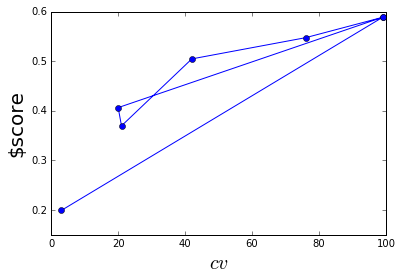

In [67]:
plt.plot(cvs,scores,'b-o')
plt.xlabel('$cv$',fontsize=20)
plt.ylabel('$score',fontsize=20)
plt.show()

# 泰坦尼克号数据分析

In [68]:
import numpy as np
from sklearn import tree

In [70]:
import pandas as pd
train = pd.read_csv('/Users/apricot/documents/github/cjc2016/data/tatanic_train.csv', sep = ",")

In [71]:
train.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [73]:
train["Age"]=train["Age"].fillna(train["Age"].median())
train["Sex"][train["Sex"]=="male"]=0
train["Sex"][train["Sex"]=="female"]=1

train["Embarked"]=train["Embarked"].fillna('S')
train["Embarked"][train["Embarked"]=="S"]=0
train["Embarked"][train["Embarked"]=="C"]=1
train["Embarked"][train["Embarked"]=="Q"]=2

/Users/apricot/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/apricot/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/apricot/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/apricot/anaconda/lib/python2.7/site-packages/ipyker

In [75]:
target=train['Survived'].values
features_one=train[["Pclass","Sex","Age","Fare"]].values

my_tree_one=tree.DecisionTreeClassifier()

my_tree_one=my_tree_one.fit(features_one,target)
print(my_tree_one.feature_importances_)
print(my_tree_one.score(features_one,target))

[ 0.12629524  0.31274009  0.22772793  0.33323674]
0.977553310887


In [76]:
test = pd.read_csv('/Users/apricot/documents/github/cjc2016/data/tatanic_test.csv', sep = ",")

test.Fare[152] = test.Fare.median()
test["Age"] = test["Age"].fillna(test["Age"].median())
test["Sex"][test["Sex"] == "male"] = 0
test["Sex"][test["Sex"] == "female"] = 1

test["Embarked"] = test["Embarked"].fillna('S')
test["Embarked"][test["Embarked"] == "S"] = 0
test["Embarked"][test["Embarked"] == "C"] = 1
test["Embarked"][test["Embarked"] == "Q"] = 2
test_features = test[["Pclass","Sex", "Age", "Fare"]].values

my_prediction = my_tree_one.predict(test_features)

PassengerId =np.array(test['PassengerId']).astype(int)
my_solution = pd.DataFrame(my_prediction, PassengerId, columns = ["Survived"])

/Users/apricot/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/apricot/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/apricot/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/apricot/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning

In [77]:
print my_solution[:3]

     Survived
892         0
893         0
894         1


In [78]:
print my_solution.shape

(418, 1)


In [79]:
my_solution.to_csv("/Users/apricot/documents/github/cjc2016/data/apricot_tatanic_solution_one.csv", index_label = ["PassengerId"])

In [80]:
features_two = train[["Pclass","Age","Sex","Fare", "SibSp", "Parch", "Embarked"]].values

max_depth = 3 # 决策树深度最多10
min_samples_split = 10 #每组的人，至少要5个人
my_tree_two = tree.DecisionTreeClassifier(max_depth = max_depth, min_samples_split = min_samples_split, random_state = 1)
my_tree_two = my_tree_two.fit(features_two, target)

print(my_tree_two.score(features_two, target))

0.827160493827


In [81]:
train_two = train
train_two['family_size'] = train.SibSp + train.Parch + 1

features_three = train[["Pclass", "Sex", "Age", "Fare", "SibSp", "Parch", "family_size"]].values

my_tree_three = tree.DecisionTreeClassifier()
my_tree_three = my_tree_three.fit(features_three, target)

print(my_tree_three.score(features_three, target))

0.979797979798


In [86]:
from sklearn.ensemble import RandomForestClassifier
features_forest=train[["Pclass","Age","Sex","Fare","SibSp","Parch","Embarked"]].values

n_estimators=200
forest = RandomForestClassifier(max_depth = 10, min_samples_split=2, n_estimators = n_estimators, random_state = 1)
my_forest=forest.fit(features_forest,target)

print(my_forest.score(features_forest,target))

test_features=test[["Pclass","Age","Sex","Fare","SibSp","Parch", "Embarked"]].values
pred_forest=my_forest.predict(test_features)
print(len(test_features))
print(pred_forest[:3])

0.941638608305
418
[0 0 0]


In [87]:
print(my_tree_two.feature_importances_)
print(my_forest.feature_importances_)

print(my_tree_two.score(features_two,target))
print(my_forest.score(features_two,target))

[ 0.21352543  0.0618669   0.62887964  0.05080152  0.04492651  0.          0.        ]
[ 0.1025595   0.20567227  0.31658491  0.24106766  0.05702681  0.04228747
  0.03480137]
0.827160493827
0.941638608305
